In [1]:
import pandas as pd
import numpy as np
# Libraries for Text Preprocessing
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Libraries for Model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

tokenizer=Tokenizer()

In [2]:
data_set = pd.read_excel('aspek pelayanan.xlsx')
data_set['text'] = data_set['clean text']
data_set.head()

,clean text,aspect,sentiment,text
0,pool mohon pelaksanaan prokes lebih_diperketat...,pelayanan,negative,pool mohon pelaksanaan prokes lebih_diperketat...
1,tidak_ada welcome_drink,pelayanan,negative,tidak_ada welcome_drink
2,pengembalian uang deposit berteletele,pelayanan,negative,pengembalian uang deposit berteletele
3,harga refund tidak_kunjung dibayarkan bulan juni,pelayanan,negative,harga refund tidak_kunjung dibayarkan bulan juni
4,uang tidak_ada kabar refund,pelayanan,negative,uang tidak_ada kabar refund


In [3]:
tokenizer.fit_on_texts(data_set["text"].values)
X_fasilitas=tokenizer.texts_to_sequences(data_set["text"].values)
X_fasilitas=pad_sequences(X_fasilitas, maxlen=31, padding='post')
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)
print(X_fasilitas.shape)

# len(X_harga)

1305
(1231, 31)


In [387]:
y=pd.get_dummies(data_set[["aspect"]])
print(y)

      aspect_lainnya  aspect_pelayanan
0                  0                 1
1                  0                 1
2                  0                 1
3                  0                 1
4                  0                 1
...              ...               ...
1226               1                 0
1227               1                 0
1228               1                 0
1229               1                 0
1230               1                 0

[1231 rows x 2 columns]


In [5]:
y=pd.get_dummies(data_set[["aspect"]])

# switch values for data aspect makanan
new_column_order = ['aspect_pelayanan', 'aspect_lainnya']
y = y[new_column_order]

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X_fasilitas, y, test_size=0.2, random_state=42)
# print("X Train: ",X_kamar)
print("Y Train: ",y_train.shape)
print("X Test: ",x_test.shape)
print("Y Test: ",y_test.shape)
print(y)

Y Train:  (984, 2)
X Test:  (247, 31)
Y Test:  (247, 2)
      aspect_pelayanan  aspect_lainnya
0                    1               0
1                    1               0
2                    1               0
3                    1               0
4                    1               0
...                ...             ...
1226                 0               1
1227                 0               1
1228                 0               1
1229                 0               1
1230                 0               1

[1231 rows x 2 columns]


In [9]:
import tensorflow as tf

# vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(3281, 32,input_length = 31))
model.add(SpatialDropout1D(0.8))
model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model_pelayanan.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 31, 32)            104992    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 31, 32)           0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 129,954
Trainable params: 129,954
Non-trainable params: 0
_________________________________________________________________


In [397]:
# Hotel yang nyaman, tempat tidur besar, toilet bersih, sarapan enak dan variasi makanan lumayan banyak. 
# review_test=['harga kamar terlalu mahal']
# review_test = ['makanan enak semua']
# review_test = ['kamar luas dan nyaman']
# review_test = ['lokasi strategis dekat pusat kota']
# review_test = ['lobi besar nyaman']
# review_test = ['aneh banget ini']
review_test = ['staff melayani dengan ramah']
review_tok=tokenizer.texts_to_sequences(review_test)
review_pad=pad_sequences(review_tok,maxlen=31,padding='post')
prediction=model_pelayanan.predict(review_pad).flatten()
model_pelayanan.save('aspek_pelayanan_3.h5')

# print("prediction: ", prediction.numpy())
print("predicted_labels: ",prediction)
print("review_pad :", review_pad)

predicted_labels:  [0.8726002  0.13076615]
review_pad : [[  9 294  81  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [291]:
# Iterate over the models and make predictions
# pelayanan tamu hotel baik dan ramah
# test_data = ['harga kamar mahal banget menguras kantong']
# test_data = ['staff cepat tanggap dan ramah pada tamu']
# test_data = ['menu makanan dan snack resto enak semua']
# test_data = ['makanan dan minuman enak semua']
test_data = ['hotel bagus sesuai harga']
# test_data_tok =tokenizer.fit_on_texts(test_data)
test_data_tok=tokenizer.texts_to_sequences(test_data)
test_data_pad=pad_sequences(test_data_tok,maxlen=31,padding='post')

print(test_data_pad)

models = ['aspek_harga.h5']
predictions = []
prediction_label = []
threshold = 0.5

for model_filename in models:
    model = tf.keras.models.load_model(model_filename)
    model_predictions = model.predict(test_data_pad).flatten()
    model_predictions = tf.where(model_predictions < threshold, 0, 1)
    predictions.append(model_predictions.numpy())

for result in predictions:
    prediction_label.append(result[0])

print(prediction_label)

[[ 4 68 24  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]]
[1]


In [453]:
test_list_single_lokasi = ['lokasi hotel strategis berada di pusat kota dan dekat dengan tempat-tempat wisata terkenal', 
                    'hotel memiliki lokasi yang sempurna, hanya beberapa langkah dari tepi pantai kuta',
                    'lokasi hotel ini sangat nyaman, terletak di dekat stasiun kereta api dan terminal bus',
                    'hotel ini terletak di lingkungan yang tenang dan damai, jauh dari keramaian kota',
                    'lokasi hotel ini sangat cocok untuk wisata kuliner, terdapat banyak restoran dan kafe terkenal di sekitarnya',
                    'hotel ini memiliki akses mudah ke pusat perbelanjaan terkenal, sehingga saya dapat dengan mudah berbelanja dan mengeksplorasi area sekitarnya',
                    'lokasi hotel ini dekat dengan tempat-tempat hiburan malam yang populer, memberikan kemudahan untuk bersenang-senang dan menikmati kehidupan malam',
                    'hotel ini terletak di tengah-tengah kawasan bisnis yang ramai, sangat ideal bagi para pebisnis yang ingin memiliki akses yang mudah ke kantor dan pertemuan bisnis',
                    'lokasi hotel ini sangat dekat dengan tempat-tempat bersejarah dan objek wisata terkenal',
                    'hotel ini memiliki lokasi yang strategis, dengan akses mudah ke bandara dan stasiun kereta api',
                    'staff tidak kurang tanggap melayani pengunjung',
                    'kamar terawat dengan baik dan memiliki dekorasi yang menawan',
                    'hotel bagus kamar mewah',
                    'kamar deluxe sangat luas dan nyaman',
                    'hotel ini menawarkan harga yang sangat terjangkau dibandingkan dengan hotel sejenis di sekitarnya',
                   ]

data_validasi = pd.DataFrame({'text': test_list_single_lokasi})
data_validasi.head(16)

,text
0,lokasi hotel strategis berada di pusat kota da...
1,"hotel memiliki lokasi yang sempurna, hanya beb..."
2,"lokasi hotel ini sangat nyaman, terletak di de..."
3,hotel ini terletak di lingkungan yang tenang d...
4,lokasi hotel ini sangat cocok untuk wisata kul...
5,hotel ini memiliki akses mudah ke pusat perbel...
6,lokasi hotel ini dekat dengan tempat-tempat hi...
7,hotel ini terletak di tengah-tengah kawasan bi...
8,lokasi hotel ini sangat dekat dengan tempat-te...
9,"hotel ini memiliki lokasi yang strategis, deng..."


In [460]:
tokenizer.fit_on_texts(data_validasi['text'])
X_validasi=tokenizer.texts_to_sequences(data_validasi['text'])
X_validasi=pad_sequences(X_validasi, maxlen=31, padding='post')

model_filenames = ['aspek_lokasi.h5']  # List of models
models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)


# Lakukan prediksi pada seluruh data test menggunakan setiap model
predictions = np.zeros((X_validasi.shape[0], len(models)))

for i, model in enumerate(models):
    preds = model.predict(X_validasi)
    preds_binary = np.where(preds > 0.5, 1, 0)
    for j, pred in enumerate(preds_binary):
        predictions[j][i] = pred[0]
        
prediction_aspect_result = predictions.astype(int)
        
# predictions.dtype
print(prediction_aspect_result)
print(data_validasi)

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
                                                 text
0   lokasi hotel strategis berada di pusat kota da...
1   hotel memiliki lokasi yang sempurna, hanya beb...
2   lokasi hotel ini sangat nyaman, terletak di de...
3   hotel ini terletak di lingkungan yang tenang d...
4   lokasi hotel ini sangat cocok untuk wisata kul...
5   hotel ini memiliki akses mudah ke pusat perbel...
6   lokasi hotel ini dekat dengan tempat-tempat hi...
7   hotel ini terletak di tengah-tengah kawasan bi...
8   lokasi hotel ini sangat dekat dengan tempat-te...
9   hotel ini memiliki lokasi yang strategis, deng...
10     staff tidak kurang tanggap melayani pengunjung
11  kamar terawat dengan baik dan memiliki dekoras...
12                            hotel bagus kamar mewah
13                kamar deluxe sangat luas dan nyaman
14  hotel ini menawarkan harga yang sangat terjang...


In [461]:
actual_aspek = [[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],[0],[0],[0],[0]]

y_pred = np.array(prediction_aspect_result)
y_true = np.array(actual_aspek)


Accuracy = metrics.accuracy_score(y_true, y_pred)
F1_score = metrics.f1_score(y_true, y_pred)
print("Accuracy lokasi :", Accuracy)
print("F1_score lokasi" ,F1_score)

Accuracy lokasi : 0.7333333333333333
F1_score lokasi 0.8181818181818182


In [237]:
# tokenizer.fit_on_texts(data_set_2['content_cleaned'])
X_validasi=tokenizer.texts_to_sequences(data_set_2['text'])
X_validasi=pad_sequences(X_validasi, maxlen=31, padding='post')

print(X_validasi)

[[  46   44   75   29   55    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [ 140    4   36 1188    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  17  142   21    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  17  637    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   9 1297   47    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   9   73    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  24    5   44    0    0  

In [275]:
from keras.models import load_model

# actual_aspek=[
#     [0, 0, 0, 0],
#     [1, 0, 0, 1],
#     [1, 0, 1, 0],
#     [1, 0, 1, 0],
#     [1, 0, 0, 0],
#     [1, 0, 0, 0],
#     [1, 1, 0, 0],
#     [0, 1, 0, 0],
#     [0, 1, 0, 0],
#     [0, 0, 0, 0],
#     [0, 1, 0, 0],
#     [0, 0, 0, 1],
#     [1, 1, 0, 1],
#     [1, 1, 1, 1],
#     [1, 0, 1, 1],
# ]

# model_filenames = ['aspek_harga.h5', 'aspek_makanan.h5', 'aspek_kamar.h5', 'aspek_pelayanan.h5']  # List of models
model_filenames = ['aspek_pelayanan.h5']  # List of models
models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)


# Lakukan prediksi pada seluruh data test menggunakan setiap model
predictions = np.zeros((X_validasi.shape[0], len(models)))

for i, model in enumerate(models):
    preds = model.predict(X_validasi)
#     print(preds)
    preds_binary = np.where(preds > 0.5, 1, 0)
    for j, pred in enumerate(preds_binary):
        predictions[j][i] = pred[0]
        
prediction_aspect_result = predictions.astype(int)
        
# predictions.dtype
print(prediction_aspect_result)
print(data_set_2['text'])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
0         fasilitas lengkap seperti bintang lima
1                      lobi hotel luas dan megah
2                          pelayanan sopan ramah
3                              pelayanan cekatan
4                             harga sangat murah
5                           harga teralalu mahal
6                           menu makanan lengkap
7     makanan dan minuman sarapan pagi enak enak
8              lokasi strategis dekat pusat kota
9                          suasan sejuk pedasaan
10                             kamar agak sempit
11                       kamar bersih dan nyaman
Name: text, dtype: object


In [276]:
actual_aspek = [[1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]]

y_pred = np.array(prediction_aspect_result)
y_true = np.array(actual_aspek)

# # Menghitung Top-1 Accuracy
# y_pred_top1 = np.argmax(y_pred, axis=1)
# top1_accuracy = np.mean(np.equal(y_pred_top1, np.argmax(y_true, axis=1)))

# # Menghitung Top-3 Accuracy
# y_pred_top3 = np.argsort(y_pred, axis=1)[:, -3:]
# top3_accuracy = np.mean(np.any(y_pred_top3 == np.argmax(y_true, axis=1)[:, np.newaxis], axis=1))

# print("aspect model list to validate:", model_filenames)
# print("actual result:", y_true)
# print("predicted result:", y_pred)
# print("Top-1 Accuracy:", top1_accuracy)
# print("Top-3 Accuracy:", top3_accuracy)

In [277]:
Accuracy = metrics.accuracy_score(y_true, y_pred)
F1_score = metrics.f1_score(y_true, y_pred)
print("Accuracy fasilitas :", Accuracy)
print("F1_score fasilitas" ,F1_score)

Accuracy fasilitas : 0.5
F1_score fasilitas 0.0


Accuracy harga : 0.9166666666666666


In [3]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

# Baca dataset dari file csv
# test_2 = pd.read_csv('test_2.csv')
test_list = ['pelayanan semua ramah dan sopan',
             'yang tidak disukai kamar tidak_kedap suara',
             'makanan enak semua',
             'fasilitas hotel yang sangat lengkap seperti bintang lima',
             'lokasi hotel strategis dekat banyak rumah makan',
             'Pelayanan yang diberikan oleh staf baik.']
test_len = len(test_list)

# Load model-model yang sudah disimpan
model_filenames = ['aspek_pelayanan.h5', 'aspek_kamar.h5', 'aspek_makanan.h5', 'aspek_harga.h5', 'aspek_fasilitas.h5', 'aspek_lokasi.h5']  # List of models
models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)

# Proses data uji
tokenizer = Tokenizer(num_words=1500)
tokenizer.fit_on_texts(test_list)
test_sequences = tokenizer.texts_to_sequences(test_list)
test_pad = pad_sequences(test_sequences, maxlen=31, padding='post')

predictions = np.zeros((test_len, len(models)))

print(predictions)

for i, model in enumerate(models):
    preds = model.predict(test_pad)
#     preds = tf.nn.softmax(preds)
    preds_binary = np.where(preds > 0.5, 1, 0)
#     predictions[:, i] = preds_binary.flatten()
    print(preds_binary.flatten())
#     predictions[:,i] = preds_binary[0].flatten()


print(test_list)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[1 0 0 1 1 0 1 0 1 0 1 0]
[1 0 0 1 1 0 0 1 1 0 1 0]
[1 0 0 1 0 1 1 0 1 0 0 1]
[1 0 0 1 0 1 1 0 1 0 1 0]
[1 0 0 1 0 1 0 1 1 0 1 0]
[1 0 0 1 0 1 1 0 1 0 0 1]
['pelayanan semua ramah dan sopan', 'yang tidak disukai kamar tidak_kedap suara', 'makanan enak semua', 'fasilitas hotel yang sangat lengkap seperti bintang lima', 'lokasi hotel strategis dekat banyak rumah makan', 'Pelayanan yang diberikan oleh staf baik.']


          Predicted 0  Predicted 1
Actual 0            7            1
Actual 1            1            7


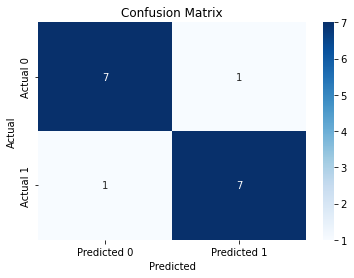

In [325]:
from sklearn.metrics import confusion_matrix

# Nilai prediksi dan actual dalam bentuk list of array
y_pred = [[1, 0, 1, 0],
          [0, 1, 0, 1],
          [1, 0, 0, 1],
          [0, 1, 1, 0]]
y_actual = [[1, 0, 1, 1],
            [0, 1, 0, 1],
            [1, 0, 0, 1],
            [0, 0, 1, 0]]

# Menggabungkan semua nilai prediksi dan actual menjadi satu list
y_pred_flat = [item for sublist in y_pred for item in sublist]
y_actual_flat = [item for sublist in y_actual for item in sublist]

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_actual_flat, y_pred_flat)

confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_mat)